In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
data = np.array(pd.read_csv('/content/drive/My Drive/projects/mnist_digit_train_data.csv'))
data1 = pd.read_csv('/content/drive/My Drive/projects/mnist_digit_train_data.csv')
test_data = pd.read_csv('/content/drive/My Drive/projects/mnist_digit_test_data.csv')
data1

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten
from sklearn.model_selection import train_test_split


In [ ]:
X = np.array(data1.iloc[:, 1:])
Y = np.array(data1['label'])

In [ ]:
Y.shape

(42000,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)


In [ ]:
X.shape[1]

784

In [ ]:
model = Sequential()

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())


model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())


model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer='sgd', loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
class mycallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs= {}):
    if(logs.get('accuracy') >.99):
      self.model.stop_training = True

In [ ]:
callback = mycallbacks()
model.fit(x_test, y_test, epochs = 20, validation_split=0.1, callbacks=[callback])

Epoch 1/20
237/237 [==============================] - 3s 8ms/step - loss: 0.7756 - accuracy: 0.7747 - val_loss: 0.3641 - val_accuracy: 0.9095
Epoch 2/20
237/237 [==============================] - 2s 7ms/step - loss: 0.3608 - accuracy: 0.9112 - val_loss: 0.2682 - val_accuracy: 0.9369
Epoch 3/20
237/237 [==============================] - 2s 7ms/step - loss: 0.2562 - accuracy: 0.9388 - val_loss: 0.2307 - val_accuracy: 0.9417
Epoch 4/20
237/237 [==============================] - 2s 7ms/step - loss: 0.1961 - accuracy: 0.9553 - val_loss: 0.2072 - val_accuracy: 0.9429
Epoch 5/20
237/237 [==============================] - 2s 7ms/step - loss: 0.1537 - accuracy: 0.9664 - val_loss: 0.1882 - val_accuracy: 0.9524
Epoch 6/20
237/237 [==============================] - 2s 8ms/step - loss: 0.1262 - accuracy: 0.9743 - val_loss: 0.1856 - val_accuracy: 0.9476
Epoch 7/20
237/237 [==============================] - 2s 7ms/step - loss: 0.1005 - accuracy: 0.9820 - val_loss: 0.1770 - val_accuracy: 0.9452
Epoch 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                8224      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                1

In [ ]:
score = model.evaluate(x_test, y_test)

263/263 [==============================] - 1s 3ms/step - loss: 0.0367 - accuracy: 0.9938


# Prediction

predicted digit:  9


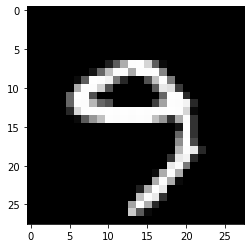

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

type(data)
a=data[9999,1:]
len(a)
si=np.reshape(a,(28,28), order='C')

plt.imshow(si, cmap='gray')
s = np.reshape(si, (1, 28*28*1))

result = np.argmax(model.predict(s), axis=-1)
print("predicted digit: ", end=" ")
print(result[0])

In [ ]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
from win32 import win32gui
from PIL import ImageGrab, Image
import numpy as np

model = model

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()

ModuleNotFoundError: ignored